## SME0822 - Análise Multivariada e Aprendizado Não Supervisionado
### Questionário 5 - Questão 9
Nome: Carolina Spera Braga \
Número USP: 7161740

### (a) Realize uma análise fatorial do conjunto de dados considerando métodos de componetes principais e de máxima verossimilhança. Compare os resultados.

In [3]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [43]:
# Leitura dos dados
df = pd.read_csv("MBA_CAR_ATTRIB.csv", sep = ";")
df

,IF_Estudante,ID_carro,Excitante,Confiável,Luxuoso,PróprioParaOArLivre,Poderoso,Estiloso,Confortável,Vigoroso,Gostoso,Seguro,Desempenho,Família,Versátil,Esportivo,Status,Prático
0,1001,5,3,5,5,1,3.0,4,5,1.0,3.0,5.0,3.0,5.0,3.0,1.0,4.0,3.0
1,1002,6,2,3,2,1,2.0,1,2,2.0,2.0,3.0,2.0,4.0,3.0,1.0,1.0,4.0
2,1003,7,3,5,4,1,4.0,4,4,1.0,3.0,5.0,3.0,NaN,4.0,2.0,4.0,3.0
3,1004,8,3,2,3,1,2.0,3,3,1.0,3.0,2.0,3.0,2.0,2.0,3.0,4.0,2.0
4,1005,9,5,4,4,2,3.0,5,3,3.0,5.0,4.0,5.0,1.0,2.0,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1299,3,2,4,4,1,4.0,4,4,1.0,3.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0
299,1300,4,5,4,3,5,4.0,4,3,5.0,5.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0
300,1301,5,4,4,3,2,2.0,4,4,1.0,4.0,4.0,3.0,3.0,3.0,1.0,3.0,1.0
301,1302,6,1,3,1,2,2.0,1,3,1.0,1.0,2.0,1.0,5.0,3.0,1.0,1.0,5.0


In [29]:
# Verificamos a existência de dados faltantes
df.isna().sum()

IF_Estudante           0
ID_carro               0
Excitante              0
Confiável              0
Luxuoso                0
PróprioParaOArLivre    0
Poderoso               1
Estiloso               0
Confortável            0
Vigoroso               2
Gostoso                1
Seguro                 1
Desempenho             1
Família                2
Versátil               1
Esportivo              4
Status                 1
Prático                2
dtype: int64

- Substituímos os dados faltantes pela média do respectivo atributo

In [44]:
# Lista de colunas com valores faltantes
colunas_faltantes = ['Poderoso', 'Vigoroso', 'Gostoso', 'Seguro', 'Desempenho', 'Família', 'Versátil', 'Esportivo', 'Status', 'Prático']

# Substitua os dados faltantes pela média de cada atributo
for coluna in colunas_faltantes:
    df[coluna].fillna(df[coluna].mean(), inplace=True)

In [47]:
# Verificamos que o novo data frame não possui dados faltantes
df.isna().sum()

IF_Estudante           0
ID_carro               0
Excitante              0
Confiável              0
Luxuoso                0
PróprioParaOArLivre    0
Poderoso               0
Estiloso               0
Confortável            0
Vigoroso               0
Gostoso                0
Seguro                 0
Desempenho             0
Família                0
Versátil               0
Esportivo              0
Status                 0
Prático                0
dtype: int64

- Matriz dos atributos para a análise fatorial.

In [48]:
X = df.iloc[:, 2:18]
X

,Excitante,Confiável,Luxuoso,PróprioParaOArLivre,Poderoso,Estiloso,Confortável,Vigoroso,Gostoso,Seguro,Desempenho,Família,Versátil,Esportivo,Status,Prático
0,3,5,5,1,3.0,4,5,1.0,3.0,5.0,3.0,5.00000,3.0,1.0,4.0,3.0
1,2,3,2,1,2.0,1,2,2.0,2.0,3.0,2.0,4.00000,3.0,1.0,1.0,4.0
2,3,5,4,1,4.0,4,4,1.0,3.0,5.0,3.0,3.44186,4.0,2.0,4.0,3.0
3,3,2,3,1,2.0,3,3,1.0,3.0,2.0,3.0,2.00000,2.0,3.0,4.0,2.0
4,5,4,4,2,3.0,5,3,3.0,5.0,4.0,5.0,1.00000,2.0,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,4,4,1,4.0,4,4,1.0,3.0,4.0,4.0,4.00000,2.0,2.0,3.0,4.0
299,5,4,3,5,4.0,4,3,5.0,5.0,4.0,3.0,3.00000,4.0,5.0,3.0,3.0
300,4,4,3,2,2.0,4,4,1.0,4.0,4.0,3.0,3.00000,3.0,1.0,3.0,1.0
301,1,3,1,2,2.0,1,3,1.0,1.0,2.0,1.0,5.00000,3.0,1.0,1.0,5.0


### Análise fatorial

In [49]:
# Cria o objeto FactorAnalyzer e performa a análise fatorial
fa = FactorAnalyzer(n_factors = 16, rotation = 'varimax')
fa.fit(X)

# Checa os autovalores
ev, v = fa.get_eigenvalues()
ev

array([5.89235964, 3.1778831 , 2.53715419, 0.65258238, 0.58685715,
       0.47877613, 0.40514961, 0.3775451 , 0.34776222, 0.29731836,
       0.28023556, 0.24852129, 0.20836904, 0.1883996 , 0.1759503 ,
       0.14513632])

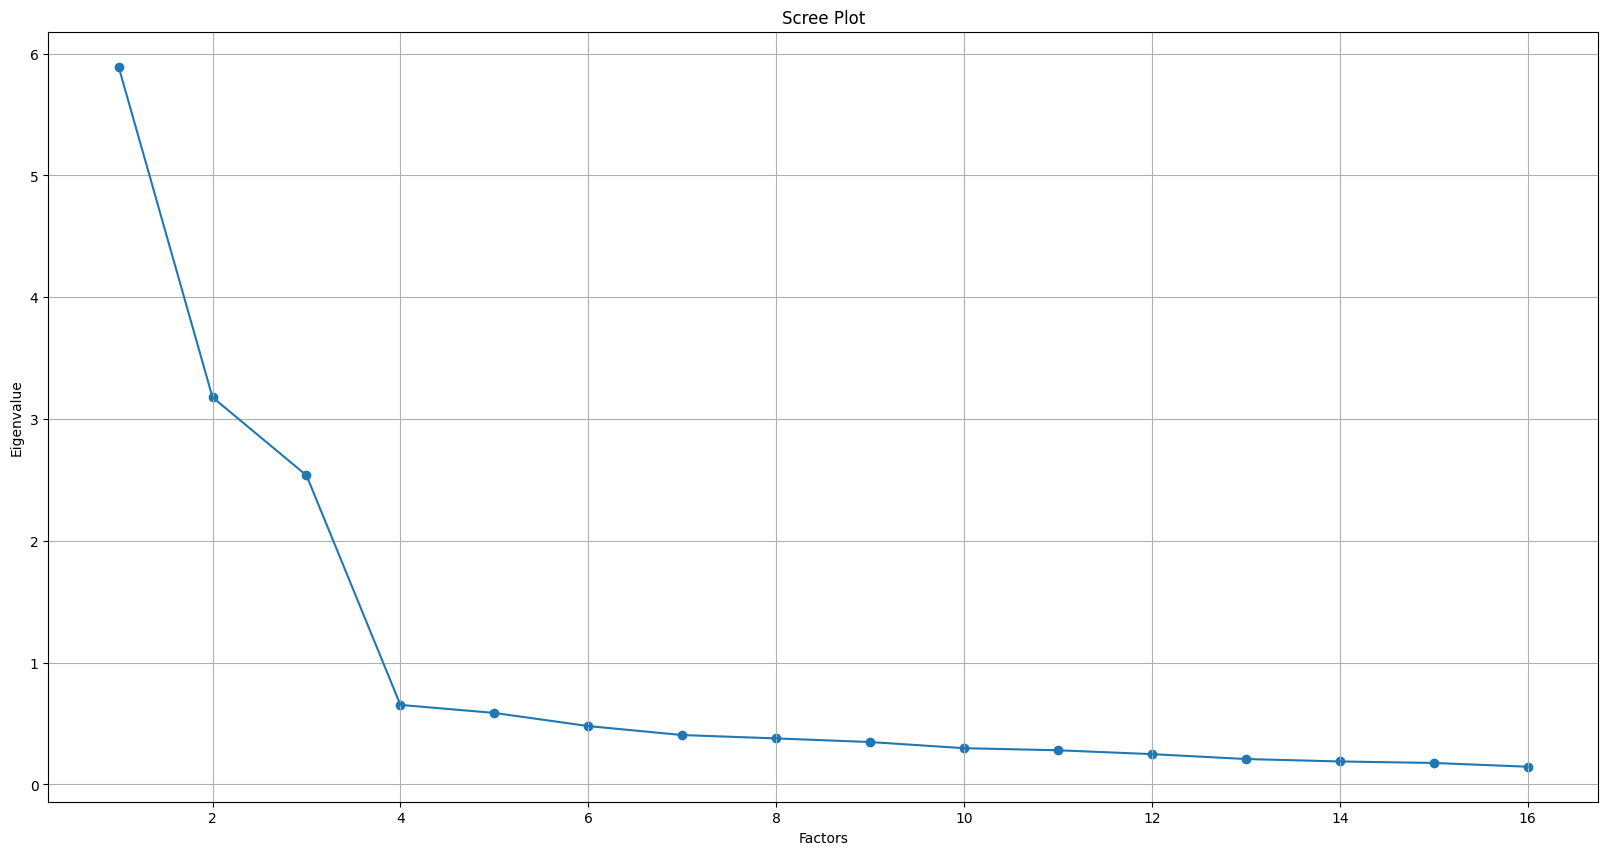

In [50]:
# Gera o scree plot
plt.figure(figsize=(20,10))
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

plt.grid()
plt.show()

De acordo com o scree plot, vamos considerar 3 fatores para a análise fatorial.

### Análise Fatorial com fatores não rotacionados

In [51]:
fa = FactorAnalyzer(n_factors = 3, rotation = None)
fa.fit(X)

FactorAnalyzer(rotation=None, rotation_kwargs={})

In [52]:
# Matriz L de cargas fatoriais estimada
L = fa.loadings_
np.round(L,2)

array([[ 0.86,  0.01,  0.2 ],
       [ 0.12,  0.52, -0.4 ],
       [ 0.63,  0.25, -0.46],
       [ 0.04,  0.43,  0.75],
       [ 0.69,  0.29,  0.18],
       [ 0.87,  0.1 , -0.07],
       [ 0.15,  0.62, -0.38],
       [ 0.05,  0.47,  0.72],
       [ 0.86,  0.07,  0.15],
       [-0.07,  0.68, -0.37],
       [ 0.77,  0.06, -0.22],
       [-0.67,  0.56, -0.05],
       [-0.24,  0.63,  0.28],
       [ 0.69, -0.  ,  0.46],
       [ 0.82,  0.11, -0.22],
       [-0.44,  0.61, -0.04]])

In [53]:
# Obtemos a variância de cada fator
fa.get_factor_variance()

(array([5.6047843 , 2.77854077, 2.21478098]),
 array([0.35029902, 0.1736588 , 0.13842381]),
 array([0.35029902, 0.52395782, 0.66238163]))

In [54]:
# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43797211, 0.21712225, 0.17306862],
       [0.02737326, 0.01357014, 0.01081679],
       [0.02737326, 0.0409434 , 0.05176019]])

### Análise Fatorial com fatores rotacionados pelo método de componentes principais

- #### Rotação ortogonal - varimax

In [55]:
# Rotação ortogonal - varimax
fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax')
fa.fit(X)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [56]:
# Matriz L de cargas fatoriais estimada
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['F1','F2','F3']
L

,F1,F2,F3
Excitante,0.860656,-0.140926,0.126517
Confiável,0.149927,0.641199,-0.060511
Luxuoso,0.638935,0.424569,-0.285290
PróprioParaOArLivre,0.081680,-0.048889,0.860099
Poderoso,0.711123,0.115344,0.270995
Estiloso,0.872478,0.086657,-0.054216
Confortável,0.179586,0.721158,0.012491
Vigoroso,0.098418,0.007949,0.854448
Gostoso,0.863085,-0.063557,0.111456
Seguro,-0.034309,0.771310,0.059162


In [57]:
# Maiores cargas, listando F1 em ordem decrescente
L.sort_values(by='F1',ascending=False)

,F1,F2,F3
Estiloso,0.872478,0.086657,-0.054216
Gostoso,0.863085,-0.063557,0.111456
Excitante,0.860656,-0.140926,0.126517
Status,0.824793,0.180466,-0.172361
Desempenho,0.769960,0.141266,-0.195348
Poderoso,0.711123,0.115344,0.270995
Esportivo,0.697335,-0.283943,0.346924
Luxuoso,0.638935,0.424569,-0.285290
Confortável,0.179586,0.721158,0.012491
Confiável,0.149927,0.641199,-0.060511


In [58]:
# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43724957, 0.2047853 , 0.18689378],
       [0.0273281 , 0.01279908, 0.01168086],
       [0.0273281 , 0.04012718, 0.05180804]])

- #### Rotação oblíqua - promax

In [59]:
# Rotação oblíqua - promax
fa = FactorAnalyzer(n_factors = 3, rotation = 'promax')
fa.fit(X)

# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43813098, 0.20271949, 0.18809501],
       [0.02738319, 0.01266997, 0.01175594],
       [0.02738319, 0.04005315, 0.05180909]])

- #### Rotação ortogonal - quartimax

In [60]:
# Rotação ortogonal - quartimax
fa = FactorAnalyzer(n_factors = 3, rotation = 'quartimax')
fa.fit(X)

# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43716774, 0.2071849 , 0.18445178],
       [0.02732298, 0.01294906, 0.01152824],
       [0.02732298, 0.04027204, 0.05180028]])

- #### Rotação ortogonal - oblimax

In [61]:
# Rotação ortogonal - oblimax
fa = FactorAnalyzer(n_factors = 3, rotation = 'oblimax')
fa.fit(X)

# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43797209, 0.21712226, 0.17306862],
       [0.02737326, 0.01357014, 0.01081679],
       [0.02737326, 0.0409434 , 0.05176019]])

### Análise Fatorial com fatores rotacionados pelo método de máxima verossimilhança

- #### Utilizando os métodos acima agora com estimação das matrizes por máxima verossimilhança


In [62]:
# Rotação ortogonal - varimax
fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax', method = 'ml')
fa.fit(X)

# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43710584, 0.20529733, 0.18651299],
       [0.02731912, 0.01283108, 0.01165706],
       [0.02731912, 0.0401502 , 0.05180726]])

In [63]:
# Rotação oblíqua - promax
fa = FactorAnalyzer(n_factors = 3, rotation = 'promax', method = 'ml')
fa.fit(X)

# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43807036, 0.20327831, 0.18757249],
       [0.0273794 , 0.01270489, 0.01172328],
       [0.0273794 , 0.04008429, 0.05180757]])

In [64]:
# Rotação ortogonal - quartimax
fa = FactorAnalyzer(n_factors = 3, rotation = 'quartimax', method = 'ml')
fa.fit(X)

# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43695968, 0.20716832, 0.18470046],
       [0.02730998, 0.01294802, 0.01154378],
       [0.02730998, 0.040258  , 0.05180178]])

In [65]:
# Rotação ortogonal - oblimax
fa = FactorAnalyzer(n_factors = 3, rotation = 'oblimax', method = 'ml')
fa.fit(X)

# Variância percentual explicada por cada fator
fa.get_factor_variance()/np.sum(fa.get_factor_variance())

array([[0.43819215, 0.1963729 , 0.19472622],
       [0.02738701, 0.01227331, 0.01217039],
       [0.02738701, 0.03966032, 0.0518307 ]])

Podemos comparar a variância percentual estimada para os três primeiros fatores para o método de componentes principais e para o método de máxima verossimilhança,

Rotação   | Método de componentes principais | Método de máxima verossimilhança
--------- | ------ | ------
varimax | [0.43718278, 0.20509818, 0.18663772] | [0.43702827, 0.20562135, 0.18625716]
promax | [0.43807173, 0.20304192, 0.18782049] | [0.43800479, 0.20360299, 0.18730263]
quartimax | [0.43707038, 0.20753097, 0.18419466] | [0.43685789, 0.20751893, 0.18444348]
oblimax | [0.43791454, 0.21722848, 0.17302045] | [0.43814998, 0.19630522, 0.19484451]

Os valores se mostram bem próximos, com alterações acontecendo por volta da quarta casa decimal para as rotações varimax, promax e quartimax, e alterações um pouco mais significativas para a rotação oblimax.

Sabemos que se a suposição de normalidade é válida, o método da máxima verossimilhança pode produzir estimativas mais precisas.

### (b) Salve os escores fatoriais e esquematize os escores fatoriais médios para cada um dos 10 carros avaliados pelos estudantes. O que o gráfico diz sobre as semelhanças e as diferenças entre os modelos? 

In [70]:
# Rotação ortogonal - varimax
fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax')

# Escores fatoriais
df[['Fator1','Fator2','Fator3']] = np.array(fa.fit_transform(X))[:, 0:3]
df.iloc[:, -3:]

,Fator1,Fator2,Fator3
0,-0.194717,1.681715,-1.216992
1,-1.794748,-0.961678,-0.508198
2,-0.008305,0.953500,-0.988198
3,-0.267608,-1.553365,-1.253161
4,1.438513,-0.755405,-0.408534
...,...,...,...
298,-0.273489,0.674362,-1.093638
299,0.679415,-0.626606,1.819777
300,-0.098216,-0.259614,-0.965227
301,-2.383047,-0.834003,-0.303689


- Ordenamos em ordem decescente o Fator 1

In [93]:
df.sort_values(by='Fator1',ascending=False).head()

,IF_Estudante,ID_carro,Excitante,Confiável,Luxuoso,PróprioParaOArLivre,Poderoso,Estiloso,Confortável,Vigoroso,...,Seguro,Desempenho,Família,Versátil,Esportivo,Status,Prático,Fator1,Fator2,Fator3
234,1235,9,5,3,5,3,5.0,5,3,3.0,...,3.0,5.0,1.0,3.0,5.0,5.0,2.0,1.678757,-0.884462,0.048923
244,1245,9,5,4,4,4,5.0,5,3,4.0,...,1.0,5.0,1.0,1.0,5.0,5.0,1.0,1.674664,-1.790518,0.341716
26,1027,1,5,4,5,3,5.0,5,3,1.0,...,3.0,5.0,1.0,2.0,5.0,5.0,2.0,1.667587,-0.795113,-0.625385
24,1025,9,5,3,5,3,5.0,5,5,3.0,...,2.0,5.0,2.0,2.0,5.0,5.0,1.0,1.664313,-0.666236,-0.049737
54,1055,9,5,4,4,5,5.0,5,3,1.0,...,4.0,5.0,1.0,2.0,5.0,5.0,1.0,1.663407,-0.898824,-0.087087


- Ordenamos em ordem decescente o Fator 2

In [94]:
df.sort_values(by='Fator2',ascending=False).head()

,IF_Estudante,ID_carro,Excitante,Confiável,Luxuoso,PróprioParaOArLivre,Poderoso,Estiloso,Confortável,Vigoroso,...,Seguro,Desempenho,Família,Versátil,Esportivo,Status,Prático,Fator1,Fator2,Fator3
232,1233,7,5,5,5,1,5.0,5,5,1.0,...,5.0,5.0,5.0,3.0,1.0,5.0,5.0,0.924556,2.165483,-0.878989
15,1016,10,2,5,4,2,4.0,4,5,1.0,...,5.0,4.0,5.0,5.0,3.0,4.0,5.0,-0.040208,1.876896,-0.229938
292,1293,7,4,5,5,3,5.0,5,5,1.0,...,5.0,5.0,5.0,4.0,3.0,5.0,3.0,1.022315,1.782679,-0.211944
40,1041,5,2,5,5,1,4.0,4,5,1.0,...,5.0,4.0,4.0,3.0,1.0,4.0,4.0,-0.083892,1.757549,-1.287399
12,1013,7,2,5,4,1,4.0,4,4,1.0,...,5.0,5.0,5.0,5.0,3.0,4.0,5.0,-0.377334,1.714805,-0.681845


- Ordenamos em ordem decescente o Fator 3

In [95]:
df.sort_values(by='Fator3',ascending=False).head()

,IF_Estudante,ID_carro,Excitante,Confiável,Luxuoso,PróprioParaOArLivre,Poderoso,Estiloso,Confortável,Vigoroso,...,Seguro,Desempenho,Família,Versátil,Esportivo,Status,Prático,Fator1,Fator2,Fator3
9,1010,4,5,3,2,5,4.0,4,3,5.0,...,4.0,3.0,4.0,5.0,5.0,4.0,5.0,0.386326,-0.299076,2.198759
189,1190,4,4,4,3,5,4.0,2,4,5.0,...,3.0,3.0,5.0,5.0,4.0,2.0,5.0,-0.348938,0.068713,2.173563
249,1250,4,4,1,1,5,5.0,5,3,5.0,...,3.0,2.0,2.0,5.0,5.0,4.0,4.0,0.598984,-1.499442,2.154303
17,1018,2,3,4,3,5,4.0,4,5,5.0,...,3.0,3.0,5.0,5.0,4.0,3.0,5.0,0.077256,0.578023,2.073051
119,1120,4,4,5,3,5,4.0,3,4,5.0,...,4.0,4.0,5.0,4.0,5.0,3.0,5.0,0.271614,0.528959,2.058993


- Matriz L de cargas fatoriais estimada

In [89]:
L = pd.DataFrame(fa.loadings_)
np.round(L,2)
L.index = X.columns
L.columns = ['F1','F2','F3']
L

,F1,F2,F3
Excitante,0.860656,-0.140926,0.126517
Confiável,0.149927,0.641199,-0.060511
Luxuoso,0.638935,0.424569,-0.285290
PróprioParaOArLivre,0.081680,-0.048889,0.860099
Poderoso,0.711123,0.115344,0.270995
Estiloso,0.872478,0.086657,-0.054216
Confortável,0.179586,0.721158,0.012491
Vigoroso,0.098418,0.007949,0.854448
Gostoso,0.863085,-0.063557,0.111456
Seguro,-0.034309,0.771310,0.059162


- Ordenamos em ordem decescente o Fator 1. Os atributos mais marcantes para este fator são: "Estiloso", "Gostoso", "Excitante" e "Status".

In [90]:
L.sort_values(by='F1',ascending=False).head(10)

,F1,F2,F3
Estiloso,0.872478,0.086657,-0.054216
Gostoso,0.863085,-0.063557,0.111456
Excitante,0.860656,-0.140926,0.126517
Status,0.824793,0.180466,-0.172361
Desempenho,0.769960,0.141266,-0.195348
Poderoso,0.711123,0.115344,0.270995
Esportivo,0.697335,-0.283943,0.346924
Luxuoso,0.638935,0.424569,-0.285290
Confortável,0.179586,0.721158,0.012491
Confiável,0.149927,0.641199,-0.060511


- Ordenamos em ordem decescente o Fator 2. Os atributos mais marcantes para este fator são: "Seguro", "Confortável", "Confiável" e "Prático".

In [91]:
L.sort_values(by='F2',ascending=False).head(10)

,F1,F2,F3
Seguro,-0.034309,0.771310,0.059162
Confortável,0.179586,0.721158,0.012491
Confiável,0.149927,0.641199,-0.060511
Prático,-0.398400,0.552509,0.317425
Família,-0.635060,0.527328,0.298479
Luxuoso,0.638935,0.424569,-0.285290
Versátil,-0.189434,0.384973,0.589960
Status,0.824793,0.180466,-0.172361
Desempenho,0.769960,0.141266,-0.195348
Poderoso,0.711123,0.115344,0.270995


- Ordenamos em ordem decescente o Fator 3. Os atributos mais marcantes para este fator são: "PróprioParaOArLivre", "Vigoroso", "Versátil" e "Esportivo".

In [92]:
L.sort_values(by='F3',ascending=False).head(10)

,F1,F2,F3
PróprioParaOArLivre,0.081680,-0.048889,0.860099
Vigoroso,0.098418,0.007949,0.854448
Versátil,-0.189434,0.384973,0.589960
Esportivo,0.697335,-0.283943,0.346924
Prático,-0.398400,0.552509,0.317425
Família,-0.635060,0.527328,0.298479
Poderoso,0.711123,0.115344,0.270995
Excitante,0.860656,-0.140926,0.126517
Gostoso,0.863085,-0.063557,0.111456
Seguro,-0.034309,0.771310,0.059162


A seguir será feita a análise para cada par de fatores. Como o Fator 2 e o Fator 3 apresentam aproximadamente a mesma porcentagem da variância explicada, resolvi fazer para todos os casos.

- Análise do Fator 1 com o Fator 2

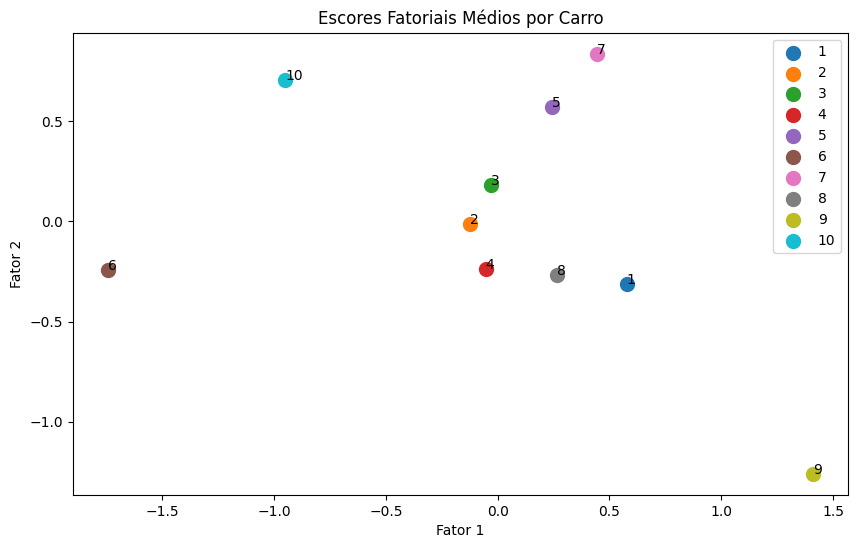

In [83]:
# Obtém os escores fatoriais
fator_scores = fa.transform(X)

# Salva os escores fatoriais em um DataFrame
df_fator_scores = pd.DataFrame(fator_scores, columns=['Fator_1', 'Fator_2', 'Fator_3'])

# Adiciona uma coluna com o nome do carro para identificação
df_fator_scores['ID_carro'] = df['ID_carro']

# Calcula os escores fatoriais médios para cada carro
media_escores = df_fator_scores.groupby('ID_carro').mean().reset_index()

# Cria um gráfico para visualizar as diferenças entre os carros nos fatores
plt.figure(figsize=(10,6))

# Plota os escores fatoriais médios para cada carro
for i, carro in enumerate(media_escores['ID_carro']):
    plt.scatter(media_escores.loc[i, 'Fator_1'], media_escores.loc[i, 'Fator_2'], label=carro, s=100)

# Adiciona rótulos aos pontos
for i, carro in enumerate(media_escores['ID_carro']):
    plt.text(media_escores.loc[i, 'Fator_1'], media_escores.loc[i, 'Fator_2'], carro)

# Adiciona rótulos aos eixos, legenda e exibe o gráfico
plt.xlabel('Fator 1')
plt.ylabel('Fator 2')
plt.legend()
plt.title('Escores Fatoriais Médios por Carro')
plt.show()

No gráfico acima temos,

1-BMW 328i, 2-Ford Explorer, 3-Infiniti J30, 4-Jeep Grand Cherokee, 5-Lexus ES300, 6-Chrysler Town & Country, 7-Mercedes C280,
8-Saab 9000, 9-Porsche Boxter, 10-Volvo V90.

Uma análise gráfica revela que Lexus ES300 e Mercedes C280 se mostram semelhantes, com pontuações parecidas para ambos os fatores. Ford Explorer, Infiniti J30 e Jeep Grand Cherokee também são similares entre si, assim como BMW 328i e Saab 9000 são similares entre si.

Chrysler Town & Country, Porsche Boxter e Volvo V90 se mostram distintos de todos os carros.

Porsche Boxter apresenta a pontuação mais alta para o Fator 1 e a mais baixa para o Fator 2, de acordo com a análise feita acima, podemos dizer que este carro é bem descrito pelos atributos "Estiloso", "Gostoso", "Excitante" e "Status".

Mercedes C280 apresenta a pontuação mais alta para o Fator 2 e pontuação acima de 0 e abaixo de 0.5 para o Fator 1. Podemos dizer que este carro é bem descrito pelos atributos "Seguro", "Confortável", "Confiável" e "Prático".

Chrysler Town & Country apresenta a pontuação mais baixa para o Fator 1, e pontuação entre -0.5 e 0 para o Fator 2. 

- Análise do Fator 1 com o Fator 3

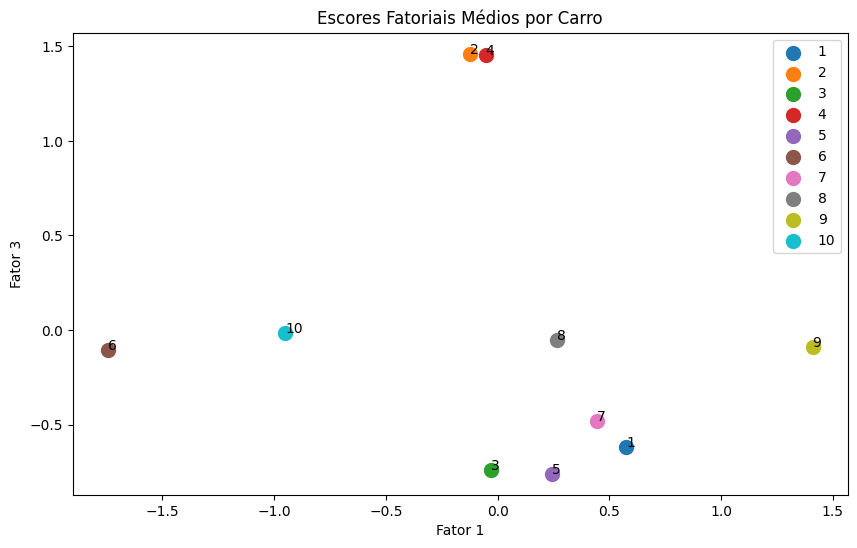

In [97]:
# Obtém os escores fatoriais
fator_scores = fa.transform(X)

# Salva os escores fatoriais em um DataFrame
df_fator_scores = pd.DataFrame(fator_scores, columns=['Fator_1', 'Fator_2', 'Fator_3'])

# Adiciona uma coluna com o nome do carro para identificação
df_fator_scores['ID_carro'] = df['ID_carro']

# Calcula os escores fatoriais médios para cada carro
media_escores = df_fator_scores.groupby('ID_carro').mean().reset_index()

# Cria um gráfico para visualizar as diferenças entre os carros nos fatores
plt.figure(figsize=(10,6))

# Plota os escores fatoriais médios para cada carro
for i, carro in enumerate(media_escores['ID_carro']):
    plt.scatter(media_escores.loc[i, 'Fator_1'], media_escores.loc[i, 'Fator_3'], label=carro, s=100)

# Adiciona rótulos aos pontos
for i, carro in enumerate(media_escores['ID_carro']):
    plt.text(media_escores.loc[i, 'Fator_1'], media_escores.loc[i, 'Fator_3'], carro)

# Adiciona rótulos aos eixos, legenda e exibe o gráfico
plt.xlabel('Fator 1')
plt.ylabel('Fator 3')
plt.legend()
plt.title('Escores Fatoriais Médios por Carro')
plt.show()

No gráfico acima temos,

1-BMW 328i, 2-Ford Explorer, 3-Infiniti J30, 4-Jeep Grand Cherokee, 5-Lexus ES300, 6-Chrysler Town & Country, 7-Mercedes C280,
8-Saab 9000, 9-Porsche Boxter, 10-Volvo V90.

Neste caso temos que Ford Explorer e Jeep Grand Cherokee são semelhantes, apresentando as maiores pontuações para o Fator 3. Ambos os carros são bem descritos por "PróprioParaOArLivre", "Vigoroso", "Versátil" e "Esportivo".

Porsche Boxter apresenta a pontuação mais alta para o Fator 1 e novamente podemos dizer que este carro é bem descrito pelos atributos "Estiloso", "Gostoso", "Excitante" e "Status".

Assim como na análise anterior, Chrysler Town & Country, Porsche Boxter e Volvo V90 se mostram distintos de todos os carros.

BMW 328i, Lexus ES300 e Mercedes C280 apresentam pontuações semelhantes tanto para o Fator 1 quanto para o Fator 3.

- Análise do Fator 2 com o Fator 3

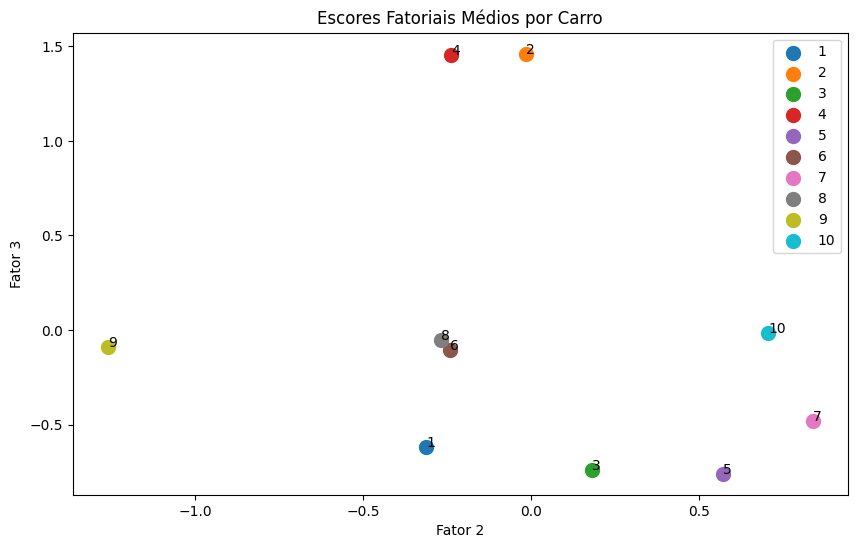

In [98]:
# Obtém os escores fatoriais
fator_scores = fa.transform(X)

# Salva os escores fatoriais em um DataFrame
df_fator_scores = pd.DataFrame(fator_scores, columns=['Fator_1', 'Fator_2', 'Fator_3'])

# Adiciona uma coluna com o nome do carro para identificação
df_fator_scores['ID_carro'] = df['ID_carro']

# Calcula os escores fatoriais médios para cada carro
media_escores = df_fator_scores.groupby('ID_carro').mean().reset_index()

# Cria um gráfico para visualizar as diferenças entre os carros nos fatores
plt.figure(figsize=(10,6))

# Plota os escores fatoriais médios para cada carro
for i, carro in enumerate(media_escores['ID_carro']):
    plt.scatter(media_escores.loc[i, 'Fator_2'], media_escores.loc[i, 'Fator_3'], label=carro, s=100)

# Adiciona rótulos aos pontos
for i, carro in enumerate(media_escores['ID_carro']):
    plt.text(media_escores.loc[i, 'Fator_2'], media_escores.loc[i, 'Fator_3'], carro)

# Adiciona rótulos aos eixos, legenda e exibe o gráfico
plt.xlabel('Fator 2')
plt.ylabel('Fator 3')
plt.legend()
plt.title('Escores Fatoriais Médios por Carro')
plt.show()

No gráfico acima temos,

1-BMW 328i, 2-Ford Explorer, 3-Infiniti J30, 4-Jeep Grand Cherokee, 5-Lexus ES300, 6-Chrysler Town & Country, 7-Mercedes C280,
8-Saab 9000, 9-Porsche Boxter, 10-Volvo V90.

Como na análise anterior, temos que Ford Explorer e Jeep Grand Cherokee são semelhantes, apresentando as maiores pontuações para o Fator 3. Ambos os carros são bem descritos por "PróprioParaOArLivre", "Vigoroso", "Versátil" e "Esportivo".

Chrysler Town & Country e Saab 9000 se mostram semelhantes, com pontuações muito próximas tanto para o Fator 2 quanto para o Fator 3.

Mercedes C280 apresenta a pontuação mais alta para o Fator 2, podemos dizer que este carro é bem descrito pelos atributos "Seguro", "Confortável", "Confiável" e "Prático".

Porsche Boxter se mostra o carro mais distinto dos demais, com a menor pontuação para o Fator 2.